#Customer Sentiment Analysis

In [5]:
# 1.Data Collection (Web Scraping):
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Initialize lists to store data
names = []
ratings = []
reviews = []
review_count = 0  

# Flipkart product reviews URL
url = """https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART&page=1"""

# Start Chrome WebDriver
driver = webdriver.Chrome()
driver.get(url)
wait = WebDriverWait(driver, 20)  # Set up an explicit wait

# Scrape multiple pages (adjust range as needed)
for page in range(1, 8000):  # Increase the range to get 320 reviews
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract Names
    name_elements = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    extracted_names = [name.text.strip() for name in name_elements]

    # Extract Ratings
    rating_elements = soup.find_all("div", {"class": "XQDdHH Ga3i8K"})
    extracted_ratings = [rating.text.strip() for rating in rating_elements]

    # Extract Reviews
    review_elements = soup.find_all("div", {"class": "ZmyHeo"})
    extracted_reviews = [review.text.strip() for review in review_elements]

    # Ensure equal lengths of all lists
    min_length = min(len(extracted_names), len(extracted_ratings), len(extracted_reviews))

    names.extend(extracted_names[:min_length])
    ratings.extend(extracted_ratings[:min_length])
    reviews.extend(extracted_reviews[:min_length])
    review_count += min_length  # Update total review count

    
    # Stop if 320 reviews are collected
    if review_count == 320:
        break

    # Click the "Next" button to go to the next page
    try:
        next_button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div/div/div[3]/div/div[1]/div[2]/div[2]/div")))
        next_button.click()
    except Exception as e:
        print("Next button not found or last page reached.")
        break  # Stop if no next button is found

# Close the browser
driver.quit()

# Print final results
print(f"\nFinal Review Count: {len(reviews)}")
print(f"Length of Names: {len(names)}")
print(f"Length of Ratings: {len(ratings)}")
print(f"Length of Reviews: {len(reviews)}")


Final Review Count: 320
Length of Names: 320
Length of Ratings: 320
Length of Reviews: 320


In [6]:
import pandas as pd
df = pd.DataFrame({"Names":names, "Ratings":ratings, "Reviews":reviews})
df

,Names,Ratings,Reviews
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
1,Ajin V,5,High quality camera😍READ MORE
2,Flipkart Customer,5,Awesome photography experience. Battery backup...
3,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE
4,Mousam Guha Roy,4,Very niceREAD MORE
...,...,...,...
315,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE
316,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
317,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ..."
318,Arunji Govindaraju,5,Awesome product very happy to hold this. Bette...


In [3]:
# 2.Data Cleaning and Preprocessing:

df["Reviews"] = df["Reviews"].str.lower()
df

,Names,Ratings,Reviews
0,Ajin V,5,high quality camera😍read more
1,Mousam Guha Roy,4,very niceread more
2,bijaya mohanty,5,just go for it.amazing one.beautiful camera wi...
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...
4,Prithivi Boruah,5,camera quality is improved loving itread more
...,...,...,...
305,Akshay Meena,5,"so beautiful, so elegant, just a vowww😍❤️read ..."
306,Flipkart Customer,5,awesome photography experience. battery backup...
307,Saurabh Gothwad,5,simply premium.read more
308,Sheetla Prasad Maurya,4,best mobile phonecamera quality is very nice b...


In [9]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import string
import pandas as pd

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Ensure 'Reviews' column exists and handle missing values
if 'Reviews' in df.columns:
    df['Reviews'] = df['Reviews'].astype(str).fillna('')  # Convert to string and handle NaN values
    df["Reviews_t"] = df["Reviews"].apply(lambda x: sent_tokenize(x))  # Apply sentence tokenization
else:
    print("Column 'Reviews' not found in DataFrame!")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
# 3.Sentiment Analysis:

from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to classify sentiment
def classify_sentiment(polarity):
    return "Positive" if polarity >= 0.1 else "Negative"

# Ensure 'Reviews' column exists and is converted to string
if 'Reviews' in df.columns:
    df['Reviews'] = df['Reviews'].astype(str).fillna('')

    # Compute sentiment polarity
    df["Polarity"] = df["Reviews"].apply(get_sentiment_polarity)

    # Classify sentiment
    df["Sentiment"] = df["Polarity"].apply(classify_sentiment)

    print(df[["Reviews", "Polarity", "Sentiment"]].head(10))  # Display sample output
else:
    print("Column 'Reviews' not found in DataFrame!")

                                             Reviews  Polarity Sentiment
0  Just go for it.Amazing one.Beautiful camera wi...  0.344444  Positive
1                      High quality camera😍READ MORE  0.330000  Positive
2  Awesome photography experience. Battery backup...  0.675000  Positive
3                              Awesome 🔥🔥☺️READ MORE  0.750000  Positive
4                                 Very niceREAD MORE  0.350000  Positive
5      Camera Quality Is Improved Loving ItREAD MORE  0.550000  Positive
6  Switch from OnePlus to iPhone I am stunned wit...  0.750000  Positive
7  So beautiful, so elegant, just a vowww😍❤️READ ...  0.616667  Positive
8  Awesome product very happy to hold this. Bette...  0.573333  Positive
9  Best mobile phoneCamera quality is very nice B...  0.718000  Positive


In [12]:
print(df.columns)

Index(['Names', 'Ratings', 'Reviews', 'Reviews_t', 'Polarity', 'Sentiment'], dtype='object')


In [13]:
sentiment_counts = df["Sentiment"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]

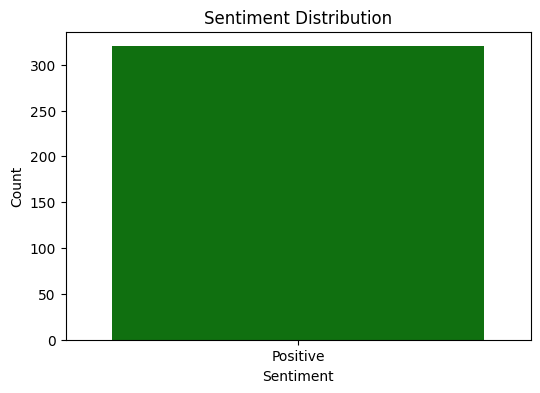

In [14]:
# 4. Data Analysis and Insights:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Ensure Ratings column exists and convert to numeric
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

##  Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.barplot(data=sentiment_counts, x="Sentiment", y="Count", hue="Sentiment", palette={"Positive": "green", "Negative": "red"}, legend=False)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

In [15]:
# Calculate correlation between Ratings and Polarity

correlation = df[['Ratings', 'Polarity']].corr()
print("Correlation between Ratings and Polarity:\n", correlation)

Correlation between Ratings and Polarity:
            Ratings  Polarity
Ratings   1.000000  0.099006
Polarity  0.099006  1.000000


In [16]:
from statistics import mean

def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

df['Polarity'] = df['Reviews_t'].apply(get_polarity)

def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df['Average_Polarity'] = df['Polarity'].apply(calculate_average_polarity)

df.head(10)

,Names,Ratings,Reviews,Reviews_t,Polarity,Sentiment,Average_Polarity
0,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,[Just go for it.Amazing one.Beautiful camera w...,[0.3444444444444444],Positive,0.344444
1,Ajin V,5,High quality camera😍READ MORE,[High quality camera😍READ MORE],[0.33],Positive,0.330000
2,Flipkart Customer,5,Awesome photography experience. Battery backup...,"[Awesome photography experience., Battery back...","[1.0, 0.7, 0.5]",Positive,0.733333
3,Rishabh Jha,5,Awesome 🔥🔥☺️READ MORE,[Awesome 🔥🔥☺️READ MORE],[0.75],Positive,0.750000
4,Mousam Guha Roy,4,Very niceREAD MORE,[Very niceREAD MORE],[0.35],Positive,0.350000
5,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE,[Camera Quality Is Improved Loving ItREAD MORE],[0.55],Positive,0.550000
6,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,[Switch from OnePlus to iPhone I am stunned wi...,"[0.0, 0.75]",Positive,0.375000
7,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ...","[So beautiful, so elegant, just a vowww😍❤️READ...",[0.6166666666666667],Positive,0.616667
8,Arunji Govindaraju,5,Awesome product very happy to hold this. Bette...,"[Awesome product very happy to hold this., Bet...","[1.0, 0.5, 0.46190476190476193]",Positive,0.653968
9,Sheetla Prasad Maurya,4,Best mobile phoneCamera quality is very nice B...,[Best mobile phoneCamera quality is very nice ...,[0.718],Positive,0.718000


In [17]:
df["Average_Polarity"].mean()

np.float64(0.5421412698412699)

In [18]:
#Word Cloud to identify the most frequently mentioned words in the positive and negative reviews

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import string

In [19]:
stopwords = set(["the", "is", "was", "very", "and", "to", "for", "with", "in", "it", "of", "this", "that", "on", "as"])
df['cleaned'] = df['Reviews'].str.lower().str.translate(str.maketrans('', '', string.punctuation))
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

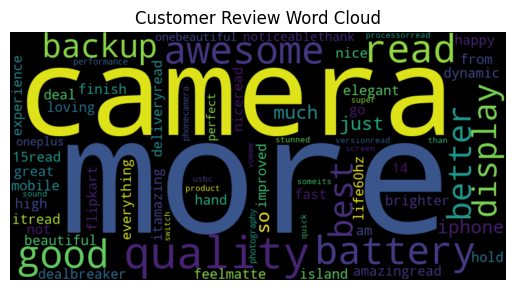

In [20]:
vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(df['cleaned'])
word_freq = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Customer Review Word Cloud")
plt.show()

Review Length Stats by Sentiment:
            count  mean        std  min  25%  50%   75%   max
Sentiment                                                   
Positive   320.0  12.9  11.139019  3.0  4.0  9.5  17.0  42.0


C:\Users\sande\AppData\Local\Temp\ipykernel_24728\2310595413.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='pastel')


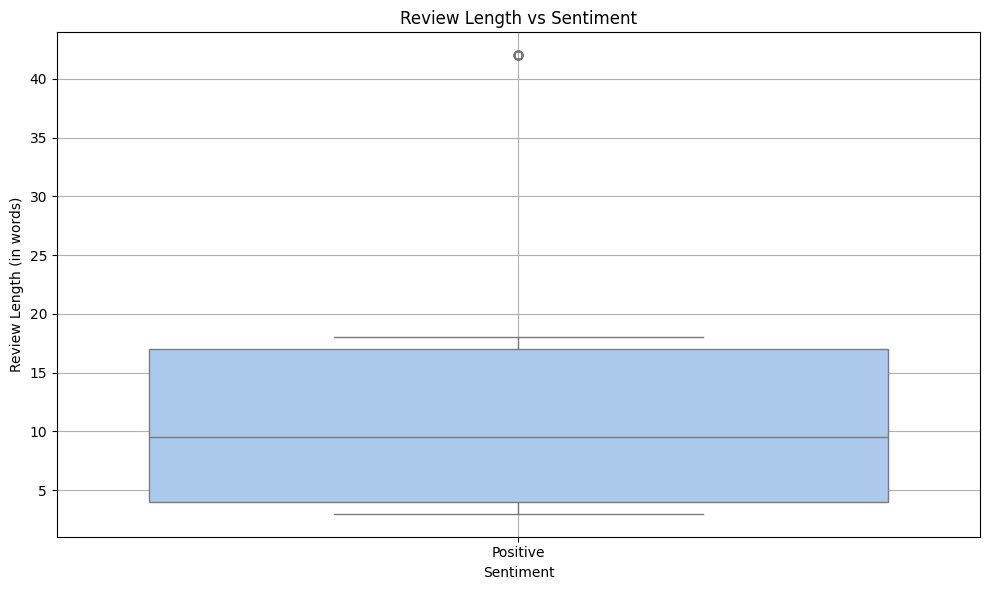

In [25]:
#Review Length Analysis

import matplotlib.pyplot as plt
import seaborn as sns

df['Review_Length'] = df['Reviews'].apply(lambda x: len(str(x).split())) #Calculating Review Length

length_stats = df.groupby('Sentiment')['Review_Length'].describe() #descriptive statistics
print("Review Length Stats by Sentiment:\n", length_stats)

# Plotting review length distribution per sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Review_Length', palette='pastel')
plt.title('Review Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length (in words)')
plt.grid(True)
plt.tight_layout()
plt.show()


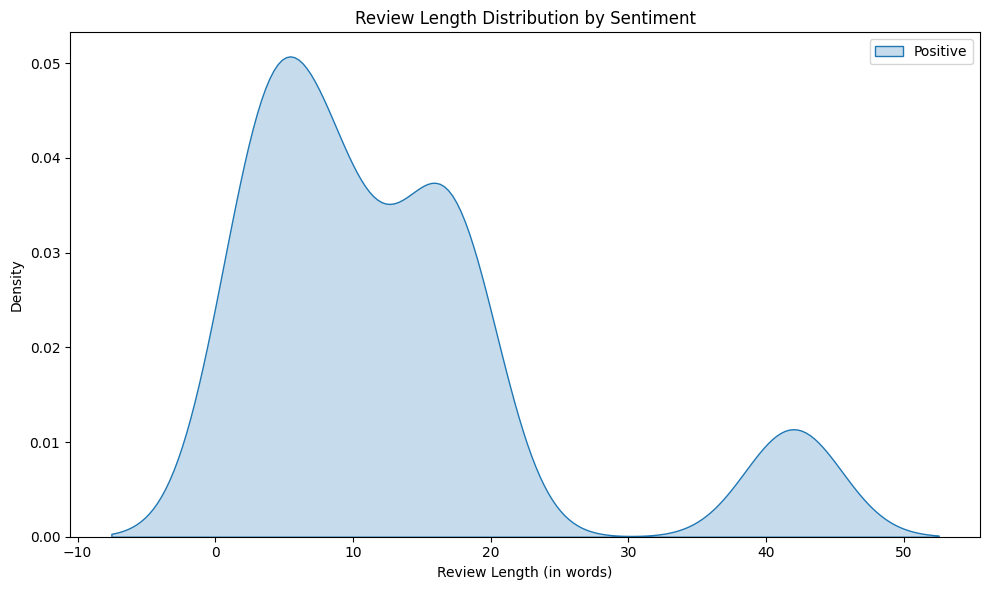

In [23]:
# KDE plot for a smoother comparison

plt.figure(figsize=(10, 6))
for sentiment in df['Sentiment'].unique():
    sns.kdeplot(df[df['Sentiment'] == sentiment]['Review_Length'], label=sentiment, fill=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (in words)')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()